In [4]:
%pylab inline

import gc
import pdet
import fpfs
import fitsio
import pltutil
import numpy as np
import numpy.lib.recfunctions as rfn
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


/lustre/work/xiangchong.li/ana/miniconda3/envs/cosmosis-mpich/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# merge data from n fields
out1=[]
out2=[]
for _i in range(500):
    _a1=fitsio.read('../../../sim/src_basicCenter-var4em3/psf60/fpfs-cut16-%04d-g1-0000.fits' %_i)
    _a2=fitsio.read('../../../sim/src_basicCenter-var4em3/psf60/fpfs-cut16-%04d-g1-2222.fits' %_i)
    out1.append(_a1)
    out2.append(_a2)
out1 =   rfn.stack_arrays(out1,usemask=False)
out2 =   rfn.stack_arrays(out2,usemask=False)

#outD1=   pdet.peak2det(out1)
outE1=   fpfs.fpfsBase.fpfsM2E(out1,const=2000,rev=True)
#outD2=   pdet.peak2det(out2)
outE2=   fpfs.fpfsBase.fpfsM2E(out2,const=2000,rev=True)

del out1,out2
gc.collect()

In [3]:
de   = np.sum(outE2['fpfs_e1'])-np.sum(outE1['fpfs_e1'])
rave = (np.sum(outE2['fpfs_RE'])+np.sum(outE1['fpfs_RE']))/2.
print(de/rave/0.04-1)

0.1635136909501531


In [10]:
def get_detbias(dets,ells,cut,dcc,ind):
    """
    Parameters:
        dets: 	    detection array
        cut:        selection cut
        dcc:        bin size when estimating marginal density
        inds:       shifting indexes
    """
    assert len(dets)==len(ells)
    fnmv   =  'pdet_v%d%d'  %ind
    fnmr1  =  'fpfs_e1v%d%dr1'%ind
    fnmr2  =  'fpfs_e2v%d%dr2'%ind
    ll     =  cut;uu  =  cut+dcc
    msk    =  (dets[fnmv]>ll)&(dets[fnmv]<uu)
    cor1=np.sum(ells[fnmr1][msk])/dcc
    cor2=np.sum(ells[fnmr2][msk])/dcc
    return cor1,cor2

In [12]:
dcc=0.01
x=[]
y1=[]
y2=[]
tt=(2,2)
pn='v%d%d' %tt

if tt != (2,2):
    xlabel=r'$I_{\rm peak}-I_{\Delta %d%d}$' %(tt[0]-2,tt[1]-2)
else:
    xlabel=r'$I_{\rm peak}$'
for i in range(0,10):
    cut=0.2*i
    
    msk1 = (outD1['pdet_%s' %pn]>cut)
    ellM1= outE1[msk1]
    detM1= outD1[msk1]
    del msk1
    
    msk2 = (outD2['pdet_%s' %pn]>cut)
    ellM2= outE2[msk2]
    detM2= outD2[msk2]
    del msk2
    
    cor1 = get_detbias(detM1,ellM1,cut,dcc,ind=tt)[0]
    cor2 = get_detbias(detM2,ellM2,cut,dcc,ind=tt)[0]
    de   = np.sum(ellM2['fpfs_e1'])-np.sum(ellM1['fpfs_e1'])
    rave = (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE']))/2.
    raveR= (np.sum(ellM2['fpfs_RE'])+np.sum(ellM1['fpfs_RE'])+cor1+cor2)/2.
    x.append(cut/np.sqrt(4e-3))
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    del ellM1,detM1,ellM2,detM2
gc.collect()

23

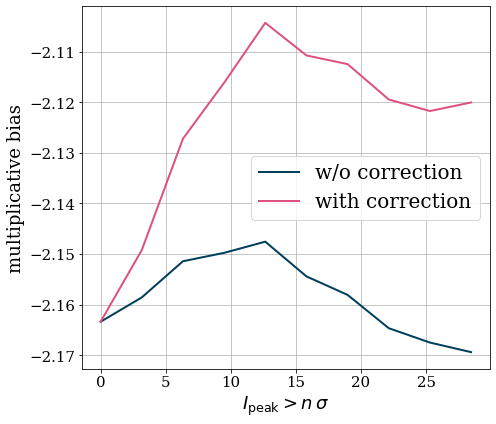

In [13]:
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.plot(np.array(x),np.array(y1),label='w/o correction',color=pltutil.colors[0])
ax.plot(np.array(x),np.array(y2),label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel+r'$>n\,\sigma$')
ax.set_ylabel('multiplicative bias')
#ax.set_ylim(-0.05,0.01)
ax.grid()
ax.legend()
plt.tight_layout()
#fig.savefig('../../html/noisy_knownRef_%s.png' %pn)

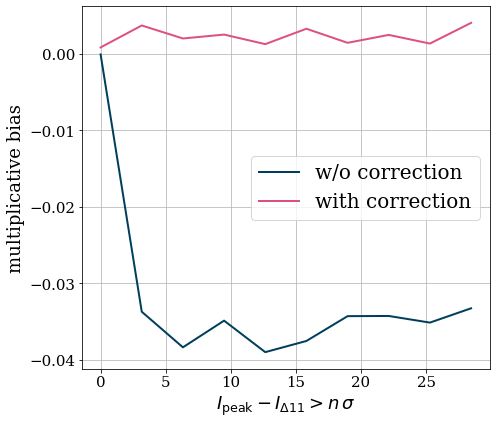

In [39]:
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.plot(np.array(x),np.array(y1),label='w/o correction',color=pltutil.colors[0])
ax.plot(np.array(x),np.array(y2),label='with correction',color=pltutil.colors[1])
ax.set_xlabel(xlabel+r'$>n\,\sigma$')
ax.set_ylabel('multiplicative bias')
#ax.set_ylim(-0.05,0.01)
ax.grid()
ax.legend()
plt.tight_layout()
fig.savefig('../html/noisy_knownRef_%s.png' %pn)

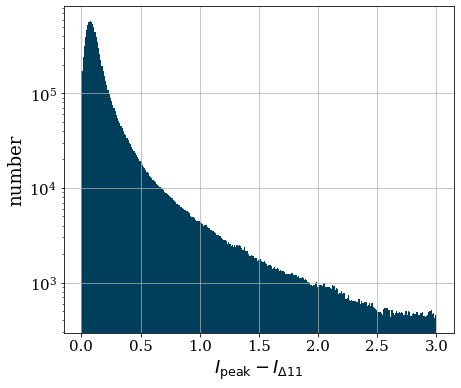

In [16]:
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.hist(out1['pdet_%s' %pn],range=(0,3),bins=300,color=pltutil.colors[0])
ax.set_yscale('log')
ax.set_xlabel(xlabel)
ax.set_ylabel('number')
ax.grid()